<a href="https://colab.research.google.com/github/vigitia/Top-Down-Object-Detection/blob/main/YOLO_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import torch
print(f"Python version: {sys.version}, {sys.version_info} ")
print(f"Pytorch version: {torch.__version__} ")

Python version: 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0], sys.version_info(major=3, minor=8, micro=15, releaselevel='final', serial=0) 
Pytorch version: 1.13.0+cu116 


In [2]:
!nvidia-smi

Thu Dec  8 13:46:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!# Download YOLOv7 code
#%cd /content/gdrive/MyDrive/
#!git clone https://github.com/WongKinYiu/yolov7
#%cd yolov7
#!pip install -r requirements.txt

In [ ]:
!# Download trained weights
#%cd /content/gdrive/MyDrive/yolov7
#!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

In [4]:
%cd /content/gdrive/MyDrive/yolov7/

/content/gdrive/MyDrive/yolov7


In [9]:
!# Training
!python train.py --batch 20 --cfg cfg/training/yolov7.yaml --epochs 55 --data /content/gdrive/MyDrive/yolo/custom_data.yaml --weights 'yolov7.pt' --device 0

YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=20, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='/content/gdrive/MyDrive/yolo/custom_data.yaml', device='0', entity=None, epochs=55, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp8', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=20, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, wa

    Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     
    54/54     13.8G   0.01547  0.004099  0.002673   0.02224        46       640: 100% 9/9 [00:31<00:00,  3.45s/it]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 2/2 [00:01<00:00,  1.09it/s]
                 all          45          45       0.936       0.953       0.969       0.706
                bowl          45          14       0.875           1       0.995       0.641
              bottle          45          15           1       0.859       0.916       0.645
                 cup          45          16       0.933           1       0.995       0.833
55 epochs completed in 0.559 hours.

Optimizer stripped from runs/train/exp8/weights/last.pt, 74.8MB

Optimizer stripped from runs/train/exp8/weights/best.pt, 74.8MB

In [15]:
!# Detection
!python detect.py --weights runs/train/exp8/weights/best.pt --conf 0.25 --img-size 640 --source ../yolo/images/val/

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='../yolo/images/val/', update=False, view_img=False, weights=['runs/train/exp8/weights/best.pt'])
YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36492560 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 bowl, Done. (15

In [11]:
# define helper functions to show images
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

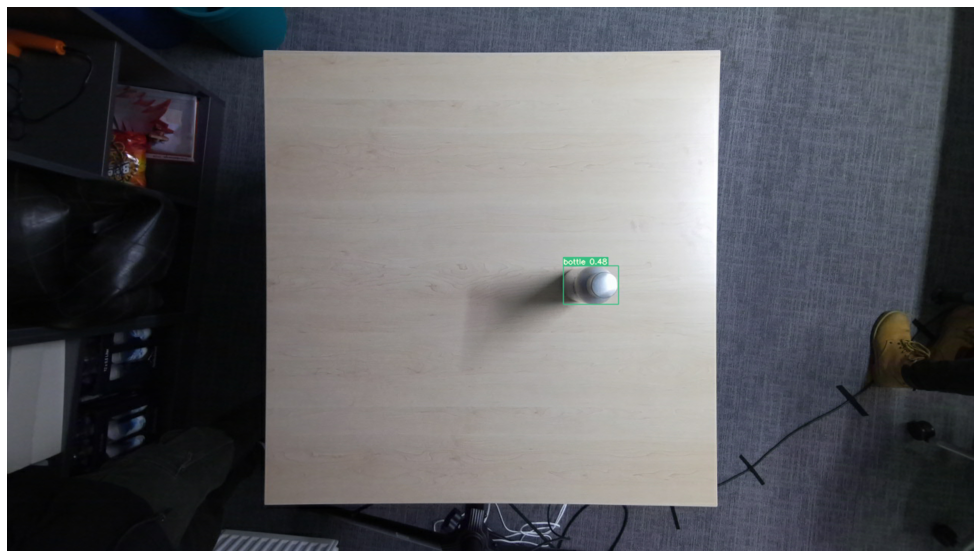

In [12]:
imShow("runs/detect/exp/f0d2faea-7088-11ed-b2e3-1b1b14efb1a9.png")

In [16]:
!# Detection pretrained weights
!python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source ../yolo/images/val

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='../yolo/images/val', update=False, view_img=False, weights=['yolov7.pt'])
YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
1 frisbee, Done. (16.3ms) Inference, (1.9ms) NMS
 The

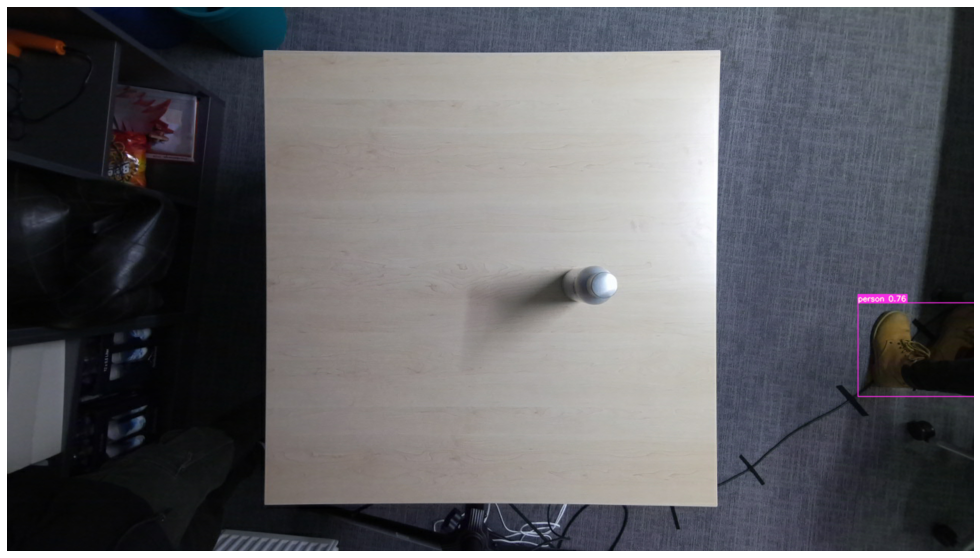

In [14]:
imShow("runs/detect/exp2/f0d2faea-7088-11ed-b2e3-1b1b14efb1a9.png")